In [48]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.preprocessing import LabelEncoder
import warnings 
warnings.filterwarnings('ignore')
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [49]:
liver_df = pd.read_csv('Liver Patient Dataset (LPD)_train.csv', encoding= 'unicode_escape')

In [50]:
liver_df.head()


,Age of the patient,Gender of the patient,Total Bilirubin,Direct Bilirubin,Alkphos Alkaline Phosphotase,Sgpt Alamine Aminotransferase,Sgot Aspartate Aminotransferase,Total Protiens,ALB Albumin,A/G Ratio Albumin and Globulin Ratio,Result
0,65.0,Female,0.7,0.1,187.0,16.0,18.0,6.8,3.3,0.90,1
1,62.0,Male,10.9,5.5,699.0,64.0,100.0,7.5,3.2,0.74,1
2,62.0,Male,7.3,4.1,490.0,60.0,68.0,7.0,3.3,0.89,1
3,58.0,Male,1.0,0.4,182.0,14.0,20.0,6.8,3.4,1.00,1
4,72.0,Male,3.9,2.0,195.0,27.0,59.0,7.3,2.4,0.40,1


In [51]:
column_names = liver_df.columns

In [52]:
liver_df.describe()

,Age of the patient,Total Bilirubin,Direct Bilirubin,Alkphos Alkaline Phosphotase,Sgpt Alamine Aminotransferase,Sgot Aspartate Aminotransferase,Total Protiens,ALB Albumin,A/G Ratio Albumin and Globulin Ratio,Result
count,30689.000000,30043.000000,30130.000000,29895.000000,30153.000000,30229.000000,30228.000000,30197.000000,30132.000000,30691.000000
mean,44.107205,3.370319,1.528042,289.075364,81.488641,111.469979,6.480237,3.130142,0.943467,1.285882
std,15.981043,6.255522,2.869592,238.537589,182.158850,280.851078,1.081980,0.792281,0.323164,0.451841
min,4.000000,0.400000,0.100000,63.000000,10.000000,10.000000,2.700000,0.900000,0.300000,1.000000
25%,32.000000,0.800000,0.200000,175.000000,23.000000,26.000000,5.800000,2.600000,0.700000,1.000000
50%,45.000000,1.000000,0.300000,209.000000,35.000000,42.000000,6.600000,3.100000,0.900000,1.000000
75%,55.000000,2.700000,1.300000,298.000000,62.000000,88.000000,7.200000,3.800000,1.100000,2.000000
max,90.000000,75.000000,19.700000,2110.000000,2000.000000,4929.000000,9.600000,5.500000,2.800000,2.000000


## Make result 1 if liver disease.


In [53]:
liver_df['Result'] = liver_df['Result']-1

# Null entries

In [54]:
liver_df.isnull().sum()

Age of the patient                        2
Gender of the patient                   902
Total Bilirubin                         648
Direct Bilirubin                        561
 Alkphos Alkaline Phosphotase           796
 Sgpt Alamine Aminotransferase          538
Sgot Aspartate Aminotransferase         462
Total Protiens                          463
 ALB Albumin                            494
A/G Ratio Albumin and Globulin Ratio    559
Result                                    0
dtype: int64

# Patients diagnosed and not-diagnosed with liver disease

Result
0    21917
1     8774
Name: count, dtype: int64

Number of patients diagnosed with liver disease:  21917
Number of patients not diagnosed with liver disease:  8774


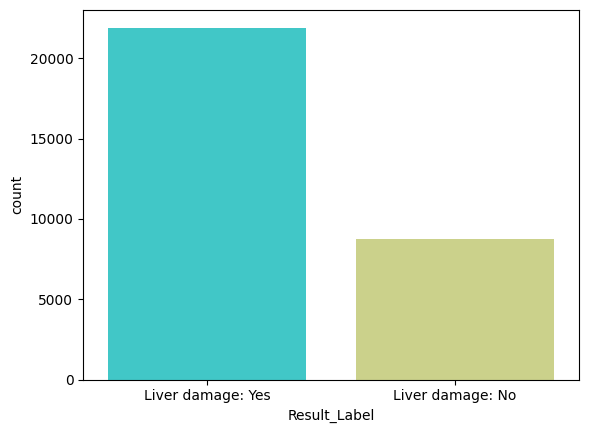

In [82]:
liver_df['Result_Label'] = liver_df['Result'].map({0: 'Liver damage: Yes', 1: 'Liver damage: No'})

sns.countplot(data=liver_df, x = 'Result_Label', label='Count', palette="rainbow")

LD, NLD = liver_df['Result'].value_counts()
print('Number of patients diagnosed with liver disease: ',LD)
print('Number of patients not diagnosed with liver disease: ',NLD)


Number of Females in the dataset:  21986
Number of Males in the dataset:  7803


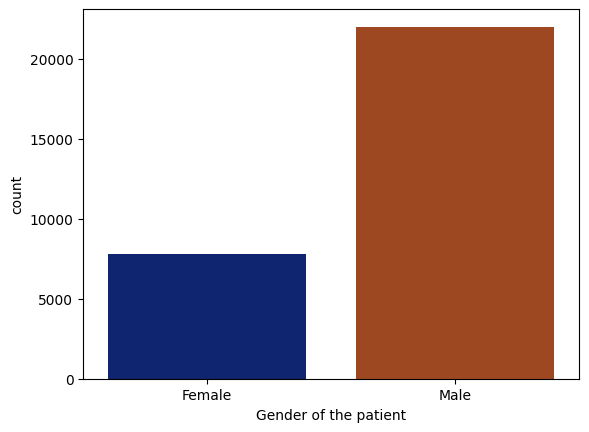

In [85]:

sns.countplot(data=liver_df, x = 'Gender of the patient', label='Count', palette="dark")

Female, Male = liver_df['Gender of the patient'].value_counts()
print('Number of Females in the dataset: ',Female)
print('Number of Males in the dataset: ',Male)


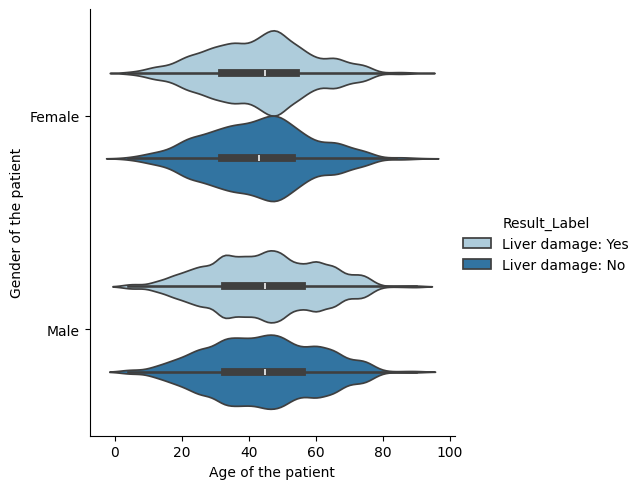

In [98]:
# Plotting patient Age vs Gender

sns.catplot(x="Age of the patient", y="Gender of the patient", hue="Result_Label", kind="violin", palette="Paired",data=liver_df)

Text(0.5, 0.98, 'Disease by Gender and Age')

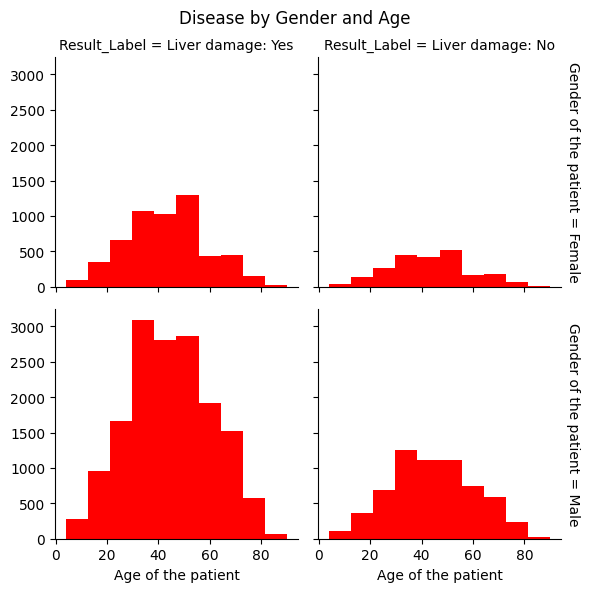

In [102]:
# Plotting Age vs Gender
g = sns.FacetGrid(liver_df, col="Result_Label", row="Gender of the patient", margin_titles=True)

g.map(plt.hist, "Age of the patient", color="red")
plt.subplots_adjust(top=0.9)
g.fig.suptitle('Disease by Gender and Age')

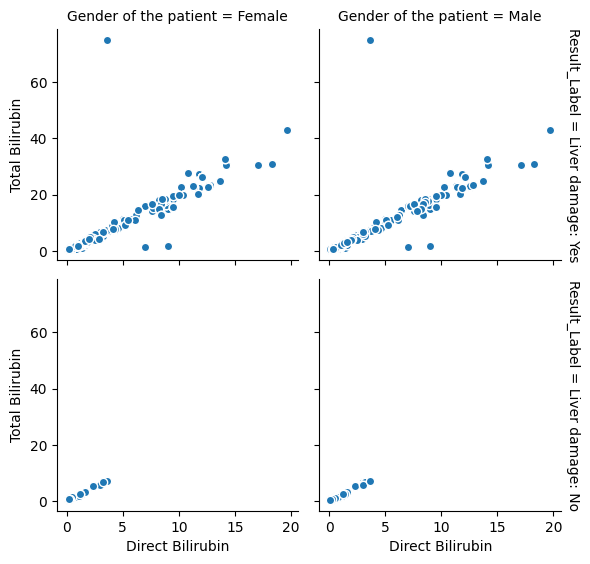

In [107]:
# Plotting Gender(Male/Female) along with Total_Bilirubin and Direct_Bilirubin
g = sns.FacetGrid(liver_df, col="Gender of the patient", row="Result_Label", margin_titles=True)

g.map(plt.scatter,"Direct Bilirubin", "Total Bilirubin", edgecolor="w")
plt.subplots_adjust(top=0.9)


# Exploration


In [56]:
X = liver_df.drop(['Gender of the patient', 'Result'], axis = 1)


Text(0.5, 1.0, 'Correlation')

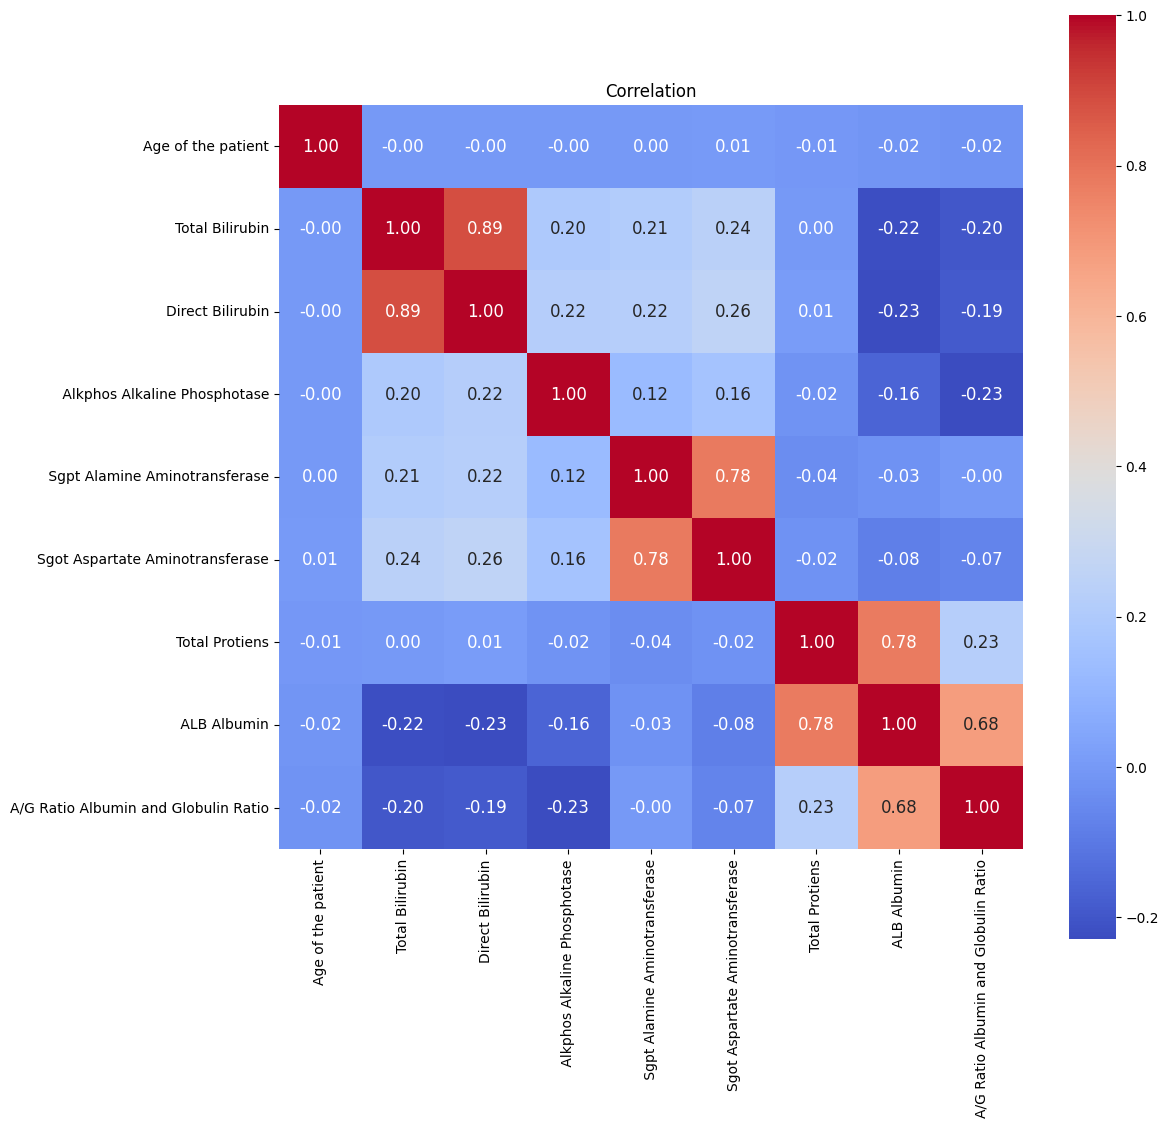

In [57]:
liver_corr = X.corr()
plt.figure(figsize=(12,12))
sns.heatmap(liver_corr, cbar=True, square=True, annot=True, fmt='.2f', annot_kws={'size':12}, cmap='coolwarm')
plt.title('Correlation')

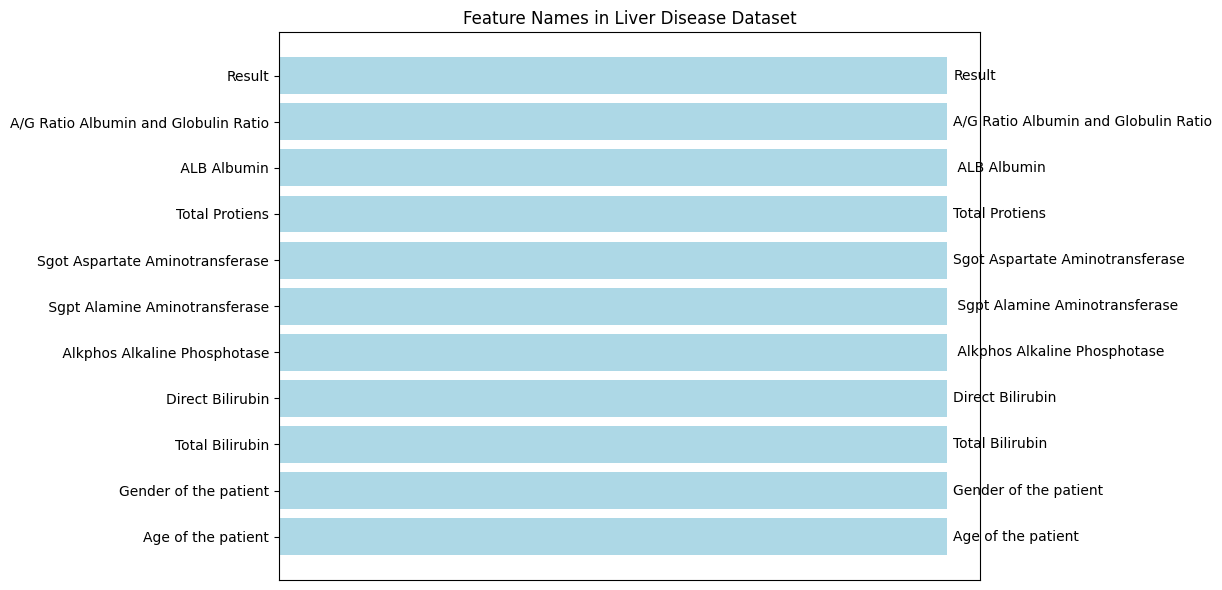

In [58]:

columns = liver_df.columns.tolist()

# Create a vertical bar chart (just using 1 for all heights to show labels)
plt.figure(figsize=(10, 6))
plt.barh(columns, [1]*len(columns), color='lightblue')
plt.title("Feature Names in Liver Disease Dataset")
plt.xticks([])  # Hide the x-axis ticks
plt.tight_layout()

# Annotate each bar with the name (optional, since it's the label too)
for i, name in enumerate(columns):
    plt.text(1.01, i, name, va='center')

plt.show()


In [59]:
y = liver_df['Result']

In [60]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.80, random_state=10)
print((X_train.shape, X_test.shape, y_train.shape, y_test.shape))

((6138, 9), (24553, 9), (6138,), (24553,))


In [61]:
y_test = np.nan_to_num(y_test)
X_test = np.nan_to_num(X_test)
X_train = np.nan_to_num(X_train)
y_train = np.nan_to_num(y_train)


# Logistic Regression

In [62]:
clf = LogisticRegression(
    penalty='l2',
    C=1.0,
    solver='lbfgs',
    max_iter=2000,
    random_state=0
)


In [63]:
clf.fit(X_train, y_train)

LogisticRegression(max_iter=2000, random_state=0)

In [64]:
y_pred = clf.predict(X_test)
y_pred

array([0, 0, 0, ..., 1, 0, 0], shape=(24553,))

In [65]:
print("Accuracy: ", accuracy_score(y_test, y_pred))

Accuracy:  0.7153097381175416


<Axes: >

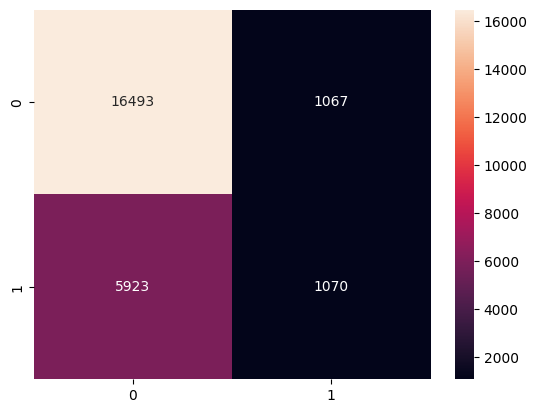

In [66]:

sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d')

# Analysis

In [67]:
X_train

array([[41.  ,  3.2 ,  1.4 , ...,  0.  ,  2.7 ,  0.8 ],
       [65.  ,  0.8 ,  0.2 , ...,  6.1 ,  3.7 ,  1.5 ],
       [55.  ,  1.4 ,  0.6 , ...,  5.  ,  1.9 ,  0.6 ],
       ...,
       [32.  , 16.7 ,  8.4 , ...,  6.9 ,  3.5 ,  1.02],
       [45.  ,  0.  ,  0.3 , ...,  6.9 ,  4.4 ,  1.7 ],
       [21.  ,  3.6 ,  1.6 , ...,  7.2 ,  2.9 ,  0.6 ]], shape=(6138, 9))

In [68]:
coefs = clf.coef_.ravel()
odds_ratios = np.exp(coefs)
feat_names = X.columns
feat_names

Index(['Age of the patient', 'Total Bilirubin', 'Direct Bilirubin',
       ' Alkphos Alkaline Phosphotase', ' Sgpt Alamine Aminotransferase',
       'Sgot Aspartate Aminotransferase', 'Total Protiens', ' ALB Albumin',
       'A/G Ratio Albumin and Globulin Ratio'],
      dtype='object')

In [69]:
df_or = pd.DataFrame({
    'feature': feat_names,
    'coef (log‑odds)': coefs,
    'odds_ratio': odds_ratios
}).sort_values('odds_ratio', ascending=False)

print(df_or)

                                feature  coef (log‑odds)  odds_ratio
8  A/G Ratio Albumin and Globulin Ratio         0.388518    1.474794
7                           ALB Albumin         0.089297    1.093406
0                    Age of the patient         0.002211    1.002213
3          Alkphos Alkaline Phosphotase        -0.000900    0.999101
5       Sgot Aspartate Aminotransferase        -0.004062    0.995946
4         Sgpt Alamine Aminotransferase        -0.010923    0.989137
6                        Total Protiens        -0.034649    0.965944
1                       Total Bilirubin        -0.084256    0.919196
2                      Direct Bilirubin        -0.507326    0.602103


Best threshold = 0.27, F1 = 0.581
McFadden's pseudo-R² = 0.168


AttributeError: 'numpy.ndarray' object has no attribute 'values'

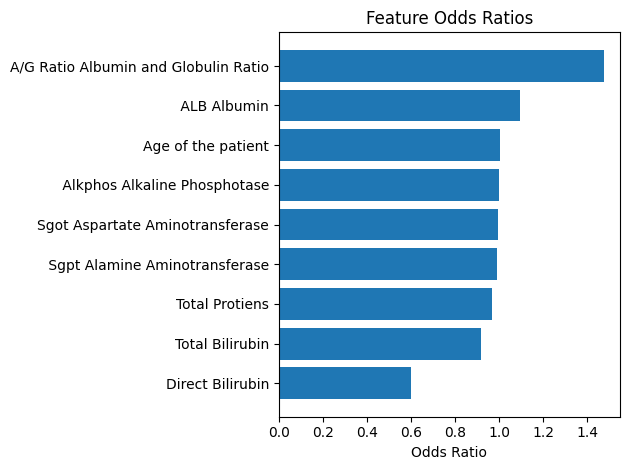

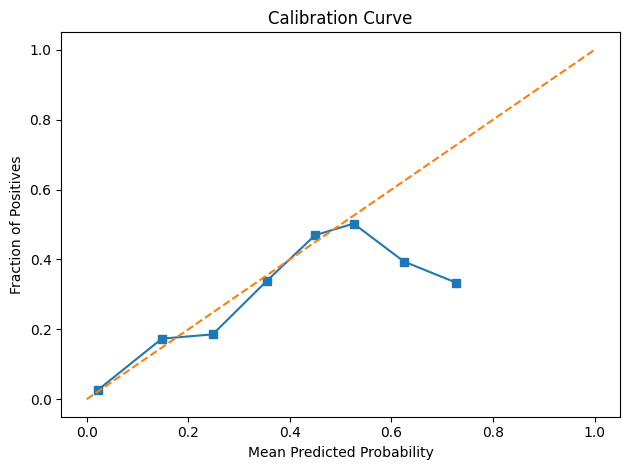

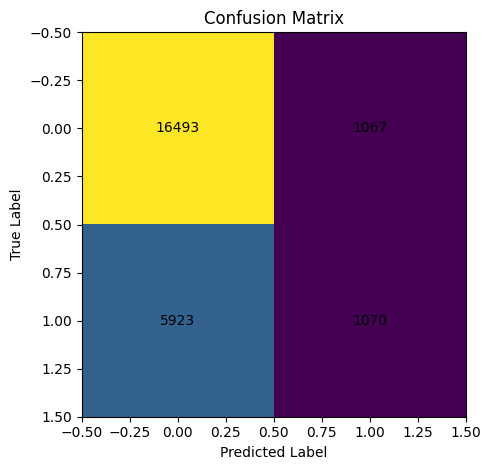

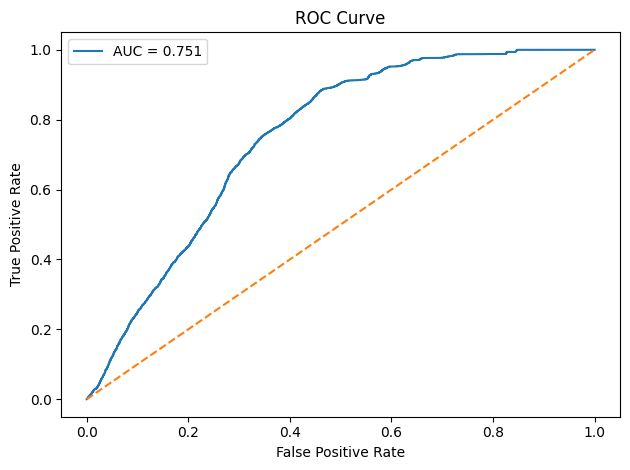

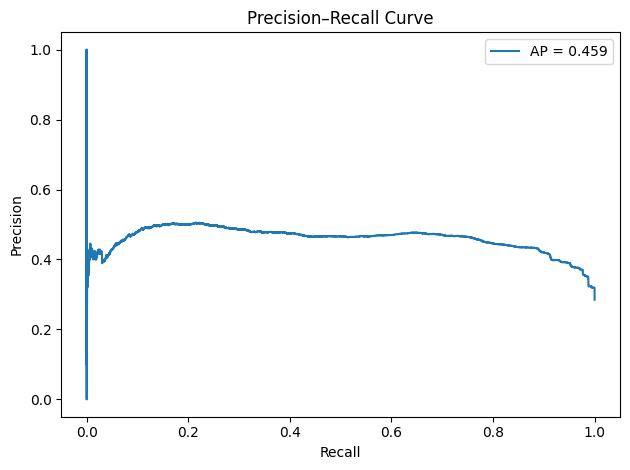

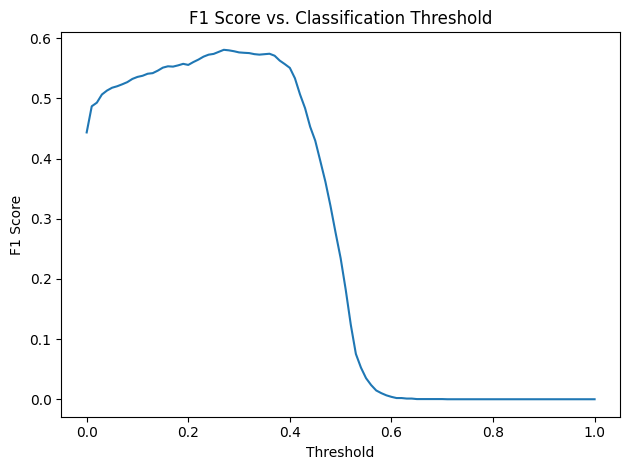

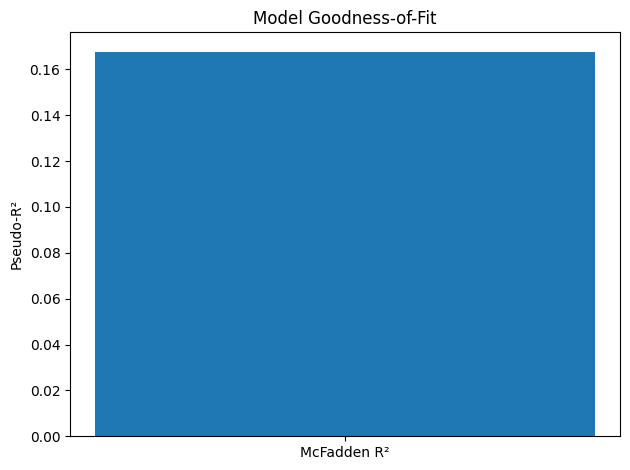

In [70]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.metrics import (
    brier_score_loss, confusion_matrix, 
    classification_report, roc_curve, roc_auc_score,
    precision_recall_curve, average_precision_score,
    f1_score
)
from sklearn.calibration import calibration_curve
from sklearn.model_selection import StratifiedKFold, cross_val_score
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

# assumes clf, X_train, X_test, y_train, y_test are already defined

# 1. Odds Ratios Bar Chart
coefs = clf.coef_.ravel()
odds_ratios = np.exp(coefs)
feat_names = X.columns
sorted_idx = np.argsort(odds_ratios)
plt.figure()
plt.barh(feat_names[sorted_idx], odds_ratios[sorted_idx])
plt.xlabel("Odds Ratio")
plt.title("Feature Odds Ratios")
plt.tight_layout()

# 2. Calibration Curve
probs = clf.predict_proba(X_test)[:, 1]
fraction_of_positives, mean_predicted_value = calibration_curve(
    y_test, probs, n_bins=10, strategy='uniform'
)
plt.figure()
plt.plot(mean_predicted_value, fraction_of_positives, 's-')
plt.plot([0, 1], [0, 1], '--')
plt.xlabel("Mean Predicted Probability")
plt.ylabel("Fraction of Positives")
plt.title("Calibration Curve")
plt.tight_layout()

# 3. Confusion Matrix Heatmap
cm = confusion_matrix(y_test, clf.predict(X_test))
plt.figure()
plt.imshow(cm, interpolation='nearest')
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        plt.text(j, i, cm[i, j], ha='center', va='center')
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.tight_layout()

# 4. ROC Curve
fpr, tpr, _ = roc_curve(y_test, probs)
auc = roc_auc_score(y_test, probs)
plt.figure()
plt.plot(fpr, tpr, label=f"AUC = {auc:.3f}")
plt.plot([0, 1], [0, 1], '--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.tight_layout()

# 5. Precision-Recall Curve
prec, rec, _ = precision_recall_curve(y_test, probs)
ap = average_precision_score(y_test, probs)
plt.figure()
plt.plot(rec, prec, label=f"AP = {ap:.3f}")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision–Recall Curve")
plt.legend()
plt.tight_layout()

# 6. F1 vs Threshold
thresholds = np.linspace(0, 1, 101)
f1_scores = [f1_score(y_test, probs >= t) for t in thresholds]
best_idx = np.argmax(f1_scores)
best_thresh, best_f1 = thresholds[best_idx], f1_scores[best_idx]
print(f"Best threshold = {best_thresh:.2f}, F1 = {best_f1:.3f}")
plt.figure()
plt.plot(thresholds, f1_scores)
plt.xlabel("Threshold")
plt.ylabel("F1 Score")
plt.title("F1 Score vs. Classification Threshold")
plt.tight_layout()

# 7. Pseudo-R² Bar Chart (McFadden)
X_sm = sm.add_constant(X_train)
model_sm = sm.Logit(y_train, X_sm).fit(disp=False)
prsquared = model_sm.prsquared
print(f"McFadden's pseudo-R² = {prsquared:.3f}")
plt.figure()
plt.bar(['McFadden R²'], [prsquared])
plt.ylabel("Pseudo-R²")
plt.title("Model Goodness-of-Fit")
plt.tight_layout()

# 8. VIF Bar Chart
X_vif = X_sm
vif_vals = [variance_inflation_factor(X_vif.values, i) for i in range(X_vif.shape[1])]
plt.figure()
plt.bar(X_vif.columns, vif_vals)
plt.xticks(rotation=90)
plt.ylabel("VIF")
plt.title("Variance Inflation Factors")
plt.tight_layout()

# 9. Cook's Distance
influence = model_sm.get_influence()
summary_frame = influence.summary_frame()
cooks_d = summary_frame['cooks_d']
plt.figure()
plt.stem(np.arange(len(cooks_d)), cooks_d, markerfmt=" ")
plt.xlabel("Observation Index")
plt.ylabel("Cook's Distance")
plt.title("Influence: Cook's Distance")
plt.tight_layout()

# 10. CV AUC Boxplot
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=0)
scores = cross_val_score(clf, X_train, y_train, cv=cv, scoring='roc_auc')
print("AUC per fold:", scores)
plt.figure()
plt.boxplot(scores, labels=['AUC'])
plt.title("Cross-Validation AUC Distribution")
plt.tight_layout()

# 11. SHAP Summary Plot (with fallback)
plt.figure()
try:
    import shap
    explainer = shap.LinearExplainer(clf, X_train, feature_dependence="independent")
    shap_vals = explainer.shap_values(X_test)
    shap.summary_plot(shap_vals, X_test, show=True)
except Exception as e:
    plt.text(0.5, 0.5, 'SHAP plot unavailable', ha='center', va='center')
    plt.axis('off')
plt.title("SHAP Feature Summary")

# 12. Lift/Gain Chart
deciles = pd.qcut(probs, 10, labels=False)
lift_df = pd.DataFrame({'y': y_test, 'prob': probs, 'decile': deciles})
agg = lift_df.groupby('decile').agg(
    count=('y','size'),
    positives=('y','sum')
).sort_index(ascending=False)
agg['response_rate'] = agg['positives'] / agg['count']
agg['lift'] = agg['response_rate'] / (y_test.mean())
plt.figure()
plt.plot(agg.index, agg['lift'], marker='o')
plt.xlabel("Decile")
plt.ylabel("Lift")
plt.title("Lift by Probability Decile")
plt.tight_layout()

# Show all figures
plt.show()


In [111]:
tn,fp,fn,tp = confusion_matrix(y_test, y_pred).ravel()


In [116]:
sensitivity = tp / (tp + fn)

specificity = tn / (tn + fp)
print(f"{sensitivity}")
print(f"{specificity}")

0.153010153010153
0.9392369020501139
